Bayesian network 5th question

In [ ]:
import numpy as np
import pandas as pd

def create_bayesian_network(data):
    # Calculate probabilities for each variable
    probabilities = {}
    variables = data.columns

    for variable in variables:
        probabilities[variable] = data[variable].value_counts(normalize=True)

    return probabilities

def query_probability(bayesian_network, variable, evidence):
    evidence_columns = list(evidence.keys())
    evidence_values = list(evidence.values())
    filtered_data = data.copy()

    # Filter the dataset based on evidence
    for column, value in zip(evidence_columns, evidence_values):
        filtered_data = filtered_data[filtered_data[column] == value]

    # Calculate the probability distribution of the variable given the evidence
    probabilities = filtered_data[variable].value_counts(normalize=True)

    return probabilities

# Load the dataset
data = pd.DataFrame({
    'Electricity': ['Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'Computer Malfunction': ['Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No'],
    'Computer Failure': ['Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No']
})

# Create the Bayesian network
bayesian_network = create_bayesian_network(data)

# Query probability: Probability of computer failure given evidence
evidence = {'Electricity': 'Yes', 'Computer Malfunction': 'Yes'}
q = query_probability(bayesian_network, 'Computer Failure', evidence)
print(f"Probability of computer failure given evidence: {q}")

# Make predictions based on evidence
predicted_values = []
for i in range(len(data)):
    instance = data.iloc[i]
    evidence = {'Electricity': instance['Electricity'], 'Computer Malfunction': instance['Computer Malfunction']}
    q = query_probability(bayesian_network, 'Computer Failure', evidence)
    predicted_values.append(q.idxmax())

print("Predicted Values:")
print(predicted_values)

# Calculate accuracy (assuming you have actual values)
actual_values = data['Computer Failure']
accuracy = np.sum(predicted_values == actual_values) / len(actual_values)
print(f"Accuracy: {accuracy * 100}%")

Probability of computer failure given evidence: Yes    0.5
No     0.5
Name: Computer Failure, dtype: float64
Predicted Values:
['Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No']
Accuracy: 71.42857142857143%


In [ ]:
import numpy as np
import pandas as pd

def calculate_class_probabilities(data):
    class_counts = data['Computer Failure'].value_counts()
    total_instances = len(data)
    class_probabilities = {}

    for class_value, count in class_counts.items():
        class_probabilities[class_value] = count / total_instances

    return class_probabilities

def calculate_feature_probabilities(data):
    feature_probabilities = {}

    for feature in data.columns[:-1]:
        feature_probabilities[feature] = {}

        for feature_value in data[feature].unique():
            feature_counts = data[data[feature] == feature_value]['Computer Failure'].value_counts()
            feature_total = feature_counts.sum()

            probabilities = {}

            for class_value, count in feature_counts.items():
                probabilities[class_value] = count / feature_total

            feature_probabilities[feature][feature_value] = probabilities

    return feature_probabilities

def predict(data, class_probabilities, feature_probabilities):
    predicted_values = []

    for i in range(len(data)):
        instance = data.iloc[i]
        probabilities = {}

        for class_value, class_probability in class_probabilities.items():
            probability = class_probability

            for feature in data.columns[:-1]:
                feature_value = instance[feature]
                feature_probability = feature_probabilities[feature][feature_value][class_value]
                probability *= feature_probability

            probabilities[class_value] = probability

        predicted_values.append(max(probabilities, key=probabilities.get))

    return predicted_values

# Load the dataset
data = pd.DataFrame({
    'Electricity': ['Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'Computer Malfunction': ['Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No'],
    'Computer Failure': ['Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No']
})

# Calculate class probabilities
class_probabilities = calculate_class_probabilities(data)

# Calculate feature probabilities
feature_probabilities = calculate_feature_probabilities(data)

# Make predictions
predicted_values = predict(data, class_probabilities, feature_probabilities)

print("Predicted Values:")
print(predicted_values)

# Calculate accuracy (assuming you have actual values)
actual_values = data['Computer Failure']
accuracy = np.sum(predicted_values == actual_values) / len(actual_values)
print(f"Accuracy: {accuracy * 100}%")

ENDING ......................


2 ND JAPAN DATSET



In [ ]:
import numpy as np
import pandas as pd
path = "/content/Untitled spreadsheet - Sheet1.csv"
data = pd.read_csv(path)
print(data, "\n")

d = np.array(data)[:, :-1]
print("\nThe attributes are:", d)

target = np.array(data)[:, -1]
print("\nThe target is:", target)


def findS(c, t):
    for i, val in enumerate(t):
        if val == "Positive":
            specifics_hypothesis = c[i].copy()
            break

    for i, val in enumerate(c):
        if t[i] == "Positive":
            for x in range(len(specifics_hypothesis)):
                if val[x] != specifics_hypothesis[x]:
                    specifics_hypothesis[x] = '?'
                else:
                    pass

    return specifics_hypothesis



hypothesis = findS(d, target)
print("\nThe final hypothesis is:", hypothesis)


def predict(data, hypothesis):
    predicted_targets = []
    for instance in data:
        match = True
        for i in range(len(hypothesis)):
            if hypothesis[i] != '?' and hypothesis[i] != instance[i]:
                match = False
                break
        if match:
            predicted_targets.append("Positive")
        else:
            predicted_targets.append("Negative")
    return predicted_targets


predicted_targets = predict(d, hypothesis)
print("\nPredicted targets:", predicted_targets)


def calculate_accuracy(actual, predicted):
    correct = sum(1 for a, p in zip(actual, predicted) if a == p)
    total = len(actual)
    accuracy = correct / total * 100
    return accuracy


accuracy = calculate_accuracy(target, predicted_targets)
print("\nAccuracy:", accuracy)


  Origin Manufacturer  Color  Decade     Type Example Type
0  Japan        Honda   Blue    1980  Economy     Positive
1  Japan       Toyoto  Green    1970   Sports     Negative
2  Japan       Toyoto   Blue    1990  Economy     Positive
3    USA     Chrysler    Red    1980  Economy     Negative
4  Japan        Honda  White    1980  Economy     Positive
5  Japan       Toyoto  Green    1980  Economy     Positive 


The attributes are: [['Japan' 'Honda' 'Blue' 1980 'Economy']
 ['Japan' 'Toyoto' 'Green' 1970 'Sports']
 ['Japan' 'Toyoto' 'Blue' 1990 'Economy']
 ['USA' 'Chrysler' 'Red' 1980 'Economy']
 ['Japan' 'Honda' 'White' 1980 'Economy']
 ['Japan' 'Toyoto' 'Green' 1980 'Economy']]

The target is: ['Positive' 'Negative' 'Positive' 'Negative' 'Positive' 'Positive']

The final hypothesis is: ['Japan' '?' '?' '?' 'Economy']

Predicted targets: ['Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive']

Accuracy: 100.0


In [ ]:
import numpy as np
import pandas as pd
import csv



data = pd.DataFrame(data=pd.read_csv('/content/Untitled spreadsheet - Sheet1.csv'))
print(data,"\n")

concepts = np.array(data.iloc[:,0:-1])
print("The attributes are: ",concepts)
target = np.array(data.iloc[:,-1])
print("\nThe target is: ",target)

with open("/content/Untitled spreadsheet - Sheet1.csv") as f:
    csv_file = csv.reader(f)
    data = list(csv_file)

    specific = data[1][:-1]
    general = [['?' for i in range(len(specific))] for j in range(len(specific))]

    for i in data:
        if i[-1] == "Positive":
            for j in range(len(specific)):
                if i[j] != specific[j]:
                    specific[j] = "?"
                    general[j][j] = "?"

        elif i[-1] == "Negative":
            for j in range(len(specific)):
                if i[j] != specific[j]:
                    general[j][j] = specific[j]
                else:
                    general[j][j] = "?"

        print("\nStep " + str(data.index(i)) + " of Candidate Elimination Algorithm")
        print(specific)
        print(general)

    gh = []  # gh = general Hypothesis
    for i in general:
        for j in i:
            if j != '?':
                gh.append(i)
                break
    print("\nFinal Specific hypothesis:\n", specific)
    print("\nFinal General hypothesis:\n", gh)

    def predict(instance, specific_hypothesis, general_hypotheses):
        for i in range(len(specific_hypothesis)):
            if specific_hypothesis[i] != '?' and specific_hypothesis[i] != instance[i]:
                return "Negative"

        for gh in general_hypotheses:
            match = True
            for i in range(len(gh)):
                if gh[i] != '?' and gh[i] != instance[i]:
                    match = False
                    break
            if match:
                return "Positive"

        return "Unknown"

    predicted_targets = []
    for instance in concepts:
        prediction = predict(instance, specific, gh)
        predicted_targets.append(prediction)

    def calculate_accuracy(actual, predicted):
        correct = sum(1 for a, p in zip(actual, predicted) if a == p)
        total = len(actual)
        accuracy = correct / total * 100
        return accuracy

    accuracy = calculate_accuracy(target, predicted_targets)
    print("\nAccuracy:", accuracy)


  Origin Manufacturer  Color  Decade     Type Example Type
0  Japan        Honda   Blue    1980  Economy     Positive
1  Japan       Toyoto  Green    1970   Sports     Negative
2  Japan       Toyoto   Blue    1990  Economy     Positive
3    USA     Chrysler    Red    1980  Economy     Negative
4  Japan        Honda  White    1980  Economy     Positive
5  Japan       Toyoto  Green    1980  Economy     Positive 

The attributes are:  [['Japan' 'Honda' 'Blue' 1980 'Economy']
 ['Japan' 'Toyoto' 'Green' 1970 'Sports']
 ['Japan' 'Toyoto' 'Blue' 1990 'Economy']
 ['USA' 'Chrysler' 'Red' 1980 'Economy']
 ['Japan' 'Honda' 'White' 1980 'Economy']
 ['Japan' 'Toyoto' 'Green' 1980 'Economy']]

The target is:  ['Positive' 'Negative' 'Positive' 'Negative' 'Positive' 'Positive']

Step 0 of Candidate Elimination Algorithm
['Japan', 'Honda', 'Blue', '1980', 'Economy']
[['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?']]

S

3 RD QUESTION ID3, NAIVE BAYES


In [ ]:
import math
import csv
from sklearn.metrics import accuracy_score



def load_csv(filename):
    lines = csv.reader(open(filename, "r"))
    dataset = list(lines)
    headers = dataset.pop(0)
    return dataset, headers

class Node:
    def __init__(self, attribute):
        self.attribute = attribute
        self.children = []
        self.answer = ""

def subtables(data, col, delete):
    dic = {}
    coldata = [row[col] for row in data]
    attr = list(set(coldata))

    counts = [0] * len(attr)
    r = len(data)
    c = len(data[0])
    for x in range(len(attr)):
        for y in range(r):
            if data[y][col] == attr[x]:
                counts[x] += 1

    for x in range(len(attr)):
        dic[attr[x]] = [[0 for i in range(c)] for j in range(counts[x])]
        pos = 0
        for y in range(r):
            if data[y][col] == attr[x]:
                if delete:
                    del data[y][col]
                dic[attr[x]][pos] = data[y]
                pos += 1
    return attr, dic

def entropy(S):
    attr = list(set(S))
    if len(attr) == 1:
        return 0

    counts = [0, 0]
    for i in range(2):
        counts[i] = sum([1 for x in S if attr[i] == x]) / (len(S) * 1.0)

    sums = 0
    for cnt in counts:
        sums += -1 * cnt * math.log(cnt, 2)
    return sums

def compute_gain(data, col):
    attr, dic = subtables(data, col, delete=False)

    total_size = len(data)
    entropies = [0] * len(attr)
    ratio = [0] * len(attr)

    total_entropy = entropy([row[-1] for row in data])
    for x in range(len(attr)):
        ratio[x] = len(dic[attr[x]]) / (total_size * 1.0)
        entropies[x] = entropy([row[-1] for row in dic[attr[x]]])
        total_entropy -= ratio[x] * entropies[x]
    return total_entropy

def build_tree(data, features):
    lastcol = [row[-1] for row in data]
    if len(set(lastcol)) == 1:
        node = Node("")
        node.answer = lastcol[0]
        return node

    n = len(data[0]) - 1
    gains = [0] * n
    for col in range(n):
        gains[col] = compute_gain(data, col)
    split = gains.index(max(gains))
    node = Node(features[split])
    fea = features[:split] + features[split + 1:]

    attr, dic = subtables(data, split, delete=True)

    for x in range(len(attr)):
        child = build_tree(dic[attr[x]], fea)
        node.children.append((attr[x], child))
    return node

def print_tree(node, level):
    if node.answer != "":
        print("  " * level, node.answer)
        return

    print("  " * level, node.attribute)
    for value, n in node.children:
        print("  " * (level + 1), value)
        print_tree(n, level + 2)

def classify(node, x_test, features):
    if node.answer != "":
        return node.answer
    pos = features.index(node.attribute)
    for value, n in node.children:
        if x_test[pos] == value:
            return classify(n, x_test, features)

'''Main program'''
dataset, features = load_csv("/content/climate_exam (1).csv")
node1 = build_tree(dataset, features)

print("The decision tree for the dataset using ID3 algorithm is")
print_tree(node1, 0)

testdata, features = load_csv("/content/climate_exam (1).csv")

test_instances = [instance[:-1] for instance in testdata]
true_labels = [instance[-1] for instance in testdata]

predicted_labels = []
for xtest in test_instances:
    predicted_label = classify(node1, xtest, features)
    predicted_labels.append(predicted_label)

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

The decision tree for the dataset using ID3 algorithm is
 Parents
   Yes
     Cinema
   No
     Weather
       Sunny
         Tennis
       Windy
         Money
           Rich
             Shopping
           Poor
             Cinema
       Rainy
         Stay in
Accuracy: 1.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset from Google Drive
path = "/content/climate_exam (1).csv"
data = pd.read_csv(path)

# Print the initial dataset
print("Initial Dataset:")
print(data.head())

# Split the dataset into features (X) and target variable (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


class NaiveBayesClassifier:
    def __init__(self):
        self.classes = None
        self.class_probabilities = None
        self.feature_probabilities = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_probabilities = self.calculate_class_probabilities(y)
        self.feature_probabilities = self.calculate_feature_probabilities(X, y)

    def calculate_class_probabilities(self, y):
        class_probabilities = {}
        total_samples = len(y)
        for class_label in self.classes:
            class_samples = np.sum(y == class_label)
            class_probabilities[class_label] = class_samples / total_samples
        return class_probabilities

    def calculate_feature_probabilities(self, X, y):
        feature_probabilities = {}
        for class_label in self.classes:
            class_samples = X[y == class_label]
            feature_probabilities[class_label] = {
                feature_index: self.calculate_probability(class_samples[:, feature_index])
                for feature_index in range(X.shape[1])
            }
        return feature_probabilities

    def calculate_probability(self, feature_values):
        total_samples = len(feature_values)
        value_counts = np.unique(feature_values, return_counts=True)
        probabilities = dict(zip(value_counts[0], value_counts[1] / total_samples))
        return probabilities

    def predict(self, X_test):
        predictions = []
        for instance in X_test:
            class_scores = []
            for class_label in self.classes:
                class_score = self.class_probabilities[class_label]
                for feature_index, feature_value in enumerate(instance):
                    feature_probability = self.feature_probabilities[class_label][feature_index]
                    if feature_value in feature_probability:
                        class_score *= feature_probability[feature_value]
                    else:
                        class_score *= 0  # Handle case when feature value is not present in probability dictionary
                class_scores.append(class_score)
            predicted_class = self.classes[np.argmax(class_scores)]
            predictions.append(predicted_class)
        return predictions

    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        accuracy = (predictions == y_test).sum() / len(y_test)
        return accuracy


# Create an instance of the NaiveBayesClassifier
naive_bayes = NaiveBayesClassifier()

# Fit the classifier to the training data
naive_bayes.fit(X_train, y_train)

# Calculate accuracy on the test data
accuracy = naive_bayes.score(X_test, y_test)
print("Accuracy: {:.2%}".format(accuracy))

# Print the instances and their predicted classes
print("\nInstances and Predictions:")
for instance, true_label in zip(X_test, y_test):
    predicted_label = naive_bayes.predict([instance])[0]
    print(f"Instance: {instance} -> Predicted Class: {predicted_label}, True Class: {true_label}")

Initial Dataset:
  Weather Parents Money Decision (Category)
0   Sunny     Yes  Rich              Cinema
1   Sunny      No  Rich              Tennis
2   Windy     Yes  Rich              Cinema
3   Rainy     Yes  Poor              Cinema
4   Rainy      No  RIch             Stay in
Accuracy: 100.00%

Instances and Predictions:
Instance: ['Windy' 'Yes' 'Rich'] -> Predicted Class: Cinema, True Class: Cinema
Instance: ['Sunny' 'No' 'Rich'] -> Predicted Class: Tennis, True Class: Tennis


In [ ]:
import numpy as np
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log

def find_entropy(df):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy


def find_entropy_attribute(df,attribute):
  Class = df.keys()[-1]
  target_variables = df[Class].unique()  #This gives all 'Yes' and 'No'
  variables = df[attribute].unique()
    #This gives different features in that attribute (like 'Hot','Cold' in Temperature)
  entropy2 = 0
  for variable in variables:
      entropy = 0
      for target_variable in target_variables:
          num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
          den = len(df[attribute][df[attribute]==variable])
          fraction = num/(den+eps)
          entropy += -fraction*log(fraction+eps)
      fraction2 = den/len(df)
      entropy2 += -fraction2*entropy
  return abs(entropy2)


def find_winner(df):
    Entropy_att = []
    IG = []
    for key in df.keys()[:-1]:
#         Entropy_att.append(find_entropy_attribute(df,key))
        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
    #rint(IG)
    #print(df.keys()[:-1][np.argmax(IG)])
    return df.keys()[:-1][np.argmax(IG)]


def get_subtable(df, node,value):
  return df[df[node] == value].reset_index(drop=True)


def buildTree(df,tree=None):
    Class = df.keys()[-1]
    #Here we build our decision tree

    #Get attribute with maximum information gain
    node = find_winner(df)

    #Get distinct value of that attribute e.g Salary is node and Low,Med and High are values
    attValue = np.unique(df[node])

    #Create an empty dictionary to create tree
    if tree is None:
        tree={}
        tree[node] = {}

   #We make loop to construct a tree by calling this function recursively.
    #In this we check if the subset is pure and stops if it is pure.

    for value in attValue:

        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable['Decision (Category)'],return_counts=True)

        if len(counts)==1:#Checking purity of subset
            tree[node][value] = clValue[0]
        else:
            tree[node][value] = buildTree(subtable) #Calling the function recursively

    return tree
tree = buildTree(data)


import pprint
pprint.pprint(tree)

ENDING ...........................


8th problem- A retail company may colledt the foloving information on houeeholds.
Household income
Household size
Head of household Occupation
Distance from nearest urban area
Retail companies often use 10 identity groups of households that are similar to each other

write a knn model for this ,without built in api ,plot the graph for the same with labels,generate your own dataset and export dataset to csv file




8 th knn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(0)
n_samples = 200
income = np.random.randint(10000, 100000, size=n_samples)
size = np.random.randint(1, 6, size=n_samples)
occupation = np.random.choice(['Engineer', 'Teacher', 'Doctor', 'Lawyer'], size=n_samples)
distance = np.random.uniform(1, 100, size=n_samples)
identity_group = np.random.randint(1, 11, size=n_samples)

# Create a DataFrame from the generated data
data = pd.DataFrame({
    'HouseholdIncome': income,
    'HouseholdSize': size,
    'Occupation': occupation,
    'DistanceFromUrbanArea': distance,
    'IdentityGroup': identity_group
})

# Export dataset to a CSV file
data.to_csv('household_data.csv', index=False)

# Euclidean distance calculation
def euclidean_distance(x1, x2):
    distance = 0
    for i in range(len(x1)):
        if isinstance(x1[i], (int, float)):
            distance += (x1[i] - x2[i]) ** 2
    return np.sqrt(distance)

# KNN model implementation
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = np.argmax(np.bincount(k_nearest_labels))
        return most_common

# Load dataset from CSV file
dataset = pd.read_csv('household_data.csv')

# Convert categorical variable to numerical using one-hot encoding
dataset = pd.get_dummies(dataset, columns=['Occupation'])

# Separate features and target variable
X = dataset.drop('IdentityGroup', axis=1).values
y = dataset['IdentityGroup'].values

# Instantiate and fit the KNN model
knn = KNN(k=3)
knn.fit(X, y)

# Generate test data for visualization
x1_test = np.random.randint(10000, 100000)
x2_test = np.random.randint(1, 6)
x3_test = np.random.uniform(1, 100)
test_data = np.array([x1_test, x2_test, x3_test, 0, 0, 0, 0])  # Add zeros for one-hot encoded categorical variables

# Predict the identity group for the test data
predicted_group = knn.predict([test_data])

# Plot all data points and color them based on the identity group
plt.figure(figsize=(10, 6))
for i, label in enumerate(np.unique(y)):
    plt.scatter(
        X[y == label, 0], X[y == label, 1],
        label=f'Identity Group {label}',
        alpha=0.7
    )

# Plot the test data point
plt.scatter(test_data[0], test_data[1], color='red', marker='x', label='Test Data')

plt.title('Household Identity Group Classification')
plt.xlabel('Household Income')
plt.ylabel('Household Size')
plt.legend()
plt.show()


8th k means


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(0)
n_samples = 200
income = np.random.randint(10000, 100000, size=n_samples)
size = np.random.randint(1, 6, size=n_samples)
occupation = np.random.choice(['Engineer', 'Teacher', 'Doctor', 'Lawyer'], size=n_samples)
distance = np.random.uniform(1, 100, size=n_samples)
identity_group = np.random.randint(1, 11, size=n_samples)

# Create a DataFrame from the generated data
data = pd.DataFrame({
    'HouseholdIncome': income,
    'HouseholdSize': size,
    'Occupation': occupation,
    'DistanceFromUrbanArea': distance,
    'IdentityGroup': identity_group
})

# Export dataset to a CSV file
data.to_csv('household_data.csv', index=False)

# K-Means model implementation
class KMeans:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters

    def fit(self, X):
        self.centroids = X[np.random.choice(range(X.shape[0]), self.n_clusters, replace=False)]

        while True:
            # Assign each data point to the nearest centroid
            labels = self._assign_labels(X)

            # Update centroids based on the mean of the data points assigned to each centroid
            new_centroids = self._update_centroids(X, labels)

            # Check if the centroids have converged
            if np.allclose(new_centroids, self.centroids):
                break

            self.centroids = new_centroids

        return labels

    def _assign_labels(self, X):
        distances = np.sqrt(((X[:, np.newaxis, :] - self.centroids) ** 2).sum(axis=2))
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        new_centroids = []
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            new_centroid = cluster_points.mean(axis=0)
            new_centroids.append(new_centroid)
        return np.array(new_centroids)

# Load dataset from CSV file
dataset = pd.read_csv('household_data.csv')

# Preprocess the dataset (drop non-numeric columns)
X = dataset.drop(['Occupation', 'IdentityGroup'], axis=1).values

# Instantiate and fit the K-Means model
kmeans = KMeans(n_clusters=10)
labels = kmeans.fit(X)

# Plot the graph with labels
plt.figure(figsize=(10, 6))
for i in range(1, 11):
    plt.scatter(
        X[labels == i, 0], X[labels == i, 1],
        label=f'Identity Group {i}',
        alpha=0.7
    )

plt.title('Household Clustering')
plt.xlabel('Household Income')
plt.ylabel('Household Size')
plt.legend()
plt.show()


ENDING ......................................................................


1 ST PROGRAM LINEAR KNN



Coefficients: [80.99650313  5.53957946]
R-squared: 0.28069735787500116
Accuracy: 28.069735787500115 %


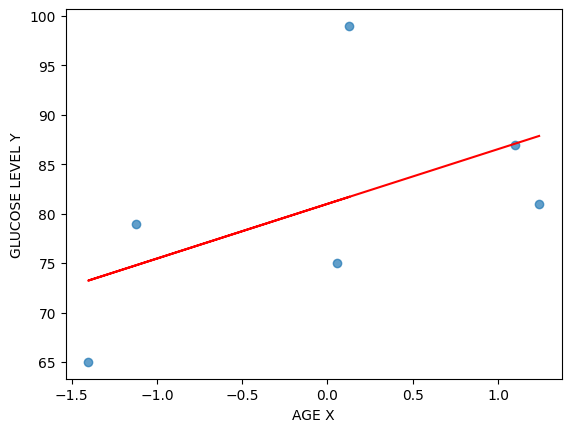

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive


# Load the dataset
data = pd.read_csv("/content/sugar (1).csv")

# Select the feature (YearsExperience) and target (Salary) variables
X = data["AGE X"].values
y = data["GLUCOSE LEVEL Y"].values

X_mean = np.mean(X)
X_std = np.std(X)
X = (X - X_mean) / X_std

# Add a column of ones to X for the intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Initialize the coefficients to zeros
theta = np.zeros(X.shape[1])

# Set the learning rate and number of iterations
alpha = 0.01
num_iterations = 1000

# Loop over the specified number of iterations
for i in range(num_iterations):
    # Calculate the predicted values
    y_pred = X.dot(theta)

    # Calculate the error between the predicted values and the true values
    error = y_pred - y

    # Update the coefficients using the LMS algorithm
    theta -= alpha * X.T.dot(error) / X.shape[0]

# Print the coefficients
print("Coefficients:", theta)

# Calculate R-squared
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)
r_squared = 1 - (ss_residual / ss_total)
print("R-squared:", r_squared)

# Calculate accuracy in percentage
accuracy = r_squared * 100
print("Accuracy:", accuracy, "%")

# Plot the data points and the line of best fit
plt.scatter(X[:, 1], y, alpha=0.7)
plt.plot(X[:, 1], X.dot(theta), color='red')
plt.xlabel("AGE X")
plt.ylabel("GLUCOSE LEVEL Y")
plt.show()


7th Bayesian

In [ ]:
import numpy as np

# Define the dataset
dataset = np.array([
    ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    ['Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    ['No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No'],
    ['No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No'],
    ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No'],
    ['Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No'],
    ['No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No'],
    ['No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    ['Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No'],
    ['No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No'],
    ['Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes'],
])

# Define the variables
variables = ['Creative', 'Smart', 'Party', 'Project', 'Mac', 'HW', 'Success', 'Happy']

# Calculate the prior probabilities
prior_probabilities = {}
for value in ['Yes', 'No']:
    prior_probabilities[value] = np.count_nonzero(dataset[:, -1] == value) / len(dataset)

# Calculate the conditional probabilities
conditional_probabilities = {}
for variable in variables[:-1]:
    conditional_probabilities[variable] = {}
    for value in ['Yes', 'No']:
        conditional_probabilities[variable][value] = {}
        for outcome in ['Yes', 'No']:
            count = np.count_nonzero((dataset[:, variables.index(variable)] == value) & (dataset[:, -1] == outcome))
            total = np.count_nonzero(dataset[:, variables.index(variable)] == value)
            conditional_probabilities[variable][value][outcome] = count / total

# Define a function to predict the value of 'Happy' for a given instance
def predict(instance, prior_probabilities, conditional_probabilities):
    # Initialize the predicted value for 'Happy'
    predicted_value = None
    max_posterior = -1

    # Iterate over possible outcomes ('Yes', 'No')
    for outcome in ['Yes', 'No']:
        # Calculate the posterior probability for the outcome
        posterior = prior_probabilities[outcome]

        # Iterate over variables
        for variable in variables[:-1]:
            value = instance[variables.index(variable)]
            if value in conditional_probabilities[variable]:
                posterior *= conditional_probabilities[variable][value][outcome]

        # Update the predicted value if the posterior is higher
        if posterior > max_posterior:
            predicted_value = outcome
            max_posterior = posterior

    return predicted_value

# Test the Naive Bayes classifier on the dataset
predictions = []
for instance in dataset:
    prediction = predict(instance, prior_probabilities, conditional_probabilities)
    predictions.append(prediction)

# Print the predictions
print('Predictions:', predictions)

# Calculate the accuracy
def calculate_accuracy(predictions, actual_values):
    correct = np.count_nonzero(predictions == actual_values)
    total = len(actual_values)
    accuracy = correct / total
    return accuracy

# Define the actual values from the dataset
actual_values = dataset[:, -1]

# Calculate the accuracy of the Naive Bayes classifier
accuracy = calculate_accuracy(np.array(predictions), actual_values)

# Print the accuracy
print('Accuracy:', accuracy)

Predictions: ['Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No']
Accuracy: 0.8181818181818182



Naive Bayes

In [ ]:
import numpy as np

# Define the dataset
dataset = np.array([
    ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    ['Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    ['No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No'],
    ['No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No'],
    ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No'],
    ['Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No'],
    ['No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No'],
    ['No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    ['Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No'],
    ['No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No'],
    ['Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes'],
])


# Define the variables
variables = ['Creative', 'Smart', 'Party', 'Project', 'Mac', 'HW', 'Success', 'Happy']

# Calculate the prior probabilities
prior_probabilities = {}
for value in ['Yes', 'No']:
    prior_probabilities[value] = np.count_nonzero(dataset[:, -1] == value) / len(dataset)

# Define the conditional probability tables (CPTs)
cpt = {}
for variable in variables:
    cpt[variable] = {}

# Calculate the conditional probabilities
for variable in variables[:-1]:
    if variable == 'Project':
        for value in ['Yes', 'No']:
            cpt[variable][value] = {}
            for outcome in ['Yes', 'No']:
                count = np.count_nonzero((dataset[:, variables.index(variable)] == value) & (dataset[:, -1] == outcome))
                total = np.count_nonzero(dataset[:, variables.index(variable)] == value)
                if total == 0:
                    cpt[variable][value][outcome] = 1e-6  # Assign a small default probability
                else:
                    cpt[variable][value][outcome] = count / total
    elif variable == 'Mac':
        for value in ['Yes', 'No']:
            cpt[variable][value] = {}
            for outcome in ['Yes', 'No']:
                count = np.count_nonzero((dataset[:, variables.index(variable)] == value) & (dataset[:, -1] == outcome))
                total = np.count_nonzero(dataset[:, variables.index(variable)] == value)
                if total == 0:
                    cpt[variable][value][outcome] = 1e-6  # Assign a small default probability
                else:
                    cpt[variable][value][outcome] = count / total
    elif variable == 'HW':
        for value in ['Yes', 'No']:
            cpt[variable][value] = {}
            for outcome in ['Yes', 'No']:
                count = np.count_nonzero((dataset[:, variables.index(variable)] == value) & (dataset[:, -1] == outcome))
                total = np.count_nonzero(dataset[:, variables.index(variable)] == value)
                if total == 0:
                    cpt[variable][value][outcome] = 1e-6  # Assign a small default probability
                else:
                    cpt[variable][value][outcome] = count / total
    elif variable == 'Success':
        for value in ['Yes', 'No']:
            cpt[variable][value] = {}
            for outcome in ['Yes', 'No']:
                count = np.count_nonzero((dataset[:, variables.index(variable)] == value) & (dataset[:, -1] == outcome))
                total = np.count_nonzero(dataset[:, variables.index(variable)] == value)
                if total == 0:
                    cpt[variable][value][outcome] = 1e-6  # Assign a small default probability
                else:
                    cpt[variable][value][outcome] = count / total
    else:
        for value in ['Yes', 'No']:
            cpt[variable][value] = {}
            for outcome in ['Yes', 'No']:
                count = np.count_nonzero((dataset[:, variables.index(variable)] == value) & (dataset[:, -1] == outcome))
                total = np.count_nonzero(dataset[:, variables.index(variable)] == value)
                if total == 0:
                    cpt[variable][value][outcome] = 1e-6  # Assign a small default probability
                else:
                    cpt[variable][value][outcome] = count / total

# Define a function to predict the value of 'Happy' for a given instance
def predict(instance, prior_probabilities, cpt):
    # Initialize the predicted value for 'Happy'
    predicted_value = None
    max_posterior = -1

    # Iterate over possible outcomes ('Yes', 'No')
    for outcome in ['Yes', 'No']:
        # Calculate the posterior probability for the outcome
        posterior = prior_probabilities[outcome]

        # Calculate the conditional probability based on dependencies
        if instance[variables.index('Project')] == 'Yes':
            posterior *= cpt['Project']['Yes'][outcome]
        if instance[variables.index('Mac')] == 'Yes':
            posterior *= cpt['Mac']['Yes'][outcome]
        if instance[variables.index('HW')] == 'Yes':
            posterior *= cpt['HW']['Yes'][outcome]
        if instance[variables.index('Success')] == 'Yes':
            posterior *= cpt['Success']['Yes'][outcome]

        # Update the predicted value if the posterior is higher
        if posterior > max_posterior:
            predicted_value = outcome
            max_posterior = posterior

    return predicted_value

# Test the Bayesian network on the dataset
predictions = []
for instance in dataset:
    prediction = predict(instance, prior_probabilities, cpt)
    predictions.append(prediction)

# Print the predictions
print('Predictions:', predictions)

# Calculate the accuracy
def calculate_accuracy(predictions, actual_values):
    correct = np.count_nonzero(predictions == actual_values)
    total = len(actual_values)
    accuracy = correct / total
    return accuracy

# Define the actual values from the dataset
actual_values = dataset[:, -1]

# Calculate the accuracy of the Bayesian network
accuracy = calculate_accuracy(np.array(predictions), actual_values)

# Print the accuracy
print('Accuracy:', accuracy)

Predictions: ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes']
Accuracy: 0.6363636363636364
